In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection as modsel
from sklearn import linear_model
from sklearn import metrics
import cv2
plt.style.use('ggplot')
# load training data - Iris
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [2]:
iris.data.shape

(150, 4)

In [8]:
iris.target.shape

(150,)

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
np.unique(iris.target)

array([0, 1, 2])

In [5]:
# make binary classification
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

Text(0, 0.5, 'sepal width (cm)')

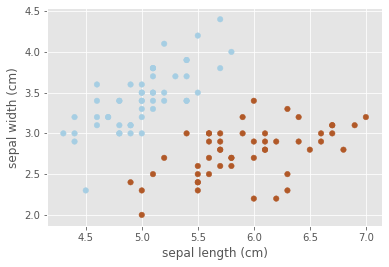

In [9]:
# inspect the data, the first two features of the Iris dataset
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=30)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [12]:
# split into train & test data sets
x_train, x_test, y_train, y_test = modsel.train_test_split(data, target, test_size=0.1, random_state=42)
x_train.shape, y_train.shape
(x_test.shape, y_test.shape)

((10, 4), (10,))

In [16]:
# train the classifier
lr = cv2.ml.LogisticRegression_create()
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)
lr.setIterations(100)
lr.train(x_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [19]:
# get the set of weights
lr.get_learnt_thetas()
# the logistic function x = -0.04090133*f0 - 0.01910263*f1 - 0.16340333*f2 + 0.28743777*f3 + 0.11909772

array([[-0.04090133, -0.01910263, -0.16340333,  0.28743777,  0.11909772]],
      dtype=float32)

In [21]:
# test the classifier
ret, y_pred = lr.predict(x_train)
metrics.accuracy_score(y_train, y_pred)

1.0

In [22]:
ret, y_pred = lr.predict(x_test)
metrics.accuracy_score(y_pred, y_test)

1.0